# Options Valuation and Implied Volatility 

**JIYA MAHESHWARI**
NetId: jiyam2

## 2.2: Option Valuation

In [6]:
import numpy as np
from scipy.stats import norm

def black_scholes1(S, K, r, d, T, sigma):
    
  d1 = (np.log(S / K) + (r - d + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  call_price = S * norm.cdf(d1,0,1) - K * np.exp(-r * T) * norm.cdf(d2,0,1)
  put_price = K * np.exp(-r * T) * norm.cdf(-d2,0,1) - S * norm.cdf(-d1,0,1)
  return call_price, put_price

def black_scholes2(S, K, r, d, T, sigma):
    
  d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  call_price = S * norm.cdf(d1,0,1) - K * np.exp(-r * T) * norm.cdf(d2,0,1)
  put_price = K * np.exp(-r * T) * norm.cdf(-d2,0,1) - S * norm.cdf(-d1,0,1)
  return call_price, put_price

S = 100
K = 100
r = 0.05
d = 0.02
T = 1
sigma = 0.3

call_price, put_price = black_scholes1(S, K, r, d, T, sigma)
call_p, put_p =  black_scholes2(S, K, r, d, T, sigma)
print("Call price with dividend", call_price)
print("Put price with dividend", put_price)
print("Call price without dividend", call_p)
print("Put price without dividend", put_p)

Call price with dividend 14.205799223543323
Put price with dividend 9.32874167361473
Call price without dividend 14.231254785985819
Put price without dividend 9.354197236057232


We cannot use just S, K, r, d, T to calculate the price of the call/put option using Black-Scholes since it requires the sigma (volatility) to determine the level of variation in the stock price before the option expires in order to theoretically determine the price of an options, also its assumed that no dividends are paid out in the lifetime of the option.

No, we don't have a sigma value when we think of the real world, especially since sigma is consistent throughout the lifetime of the option, which is untrue in the real world. I believe that people replace sigma (expected volatility) with implied volatility or historical volatility.

## 2.3 : Implied Volatility 

In [7]:
from scipy.optimize import fmin
import numpy as np
import scipy.stats as si

def NORMSDIST(x):
    NORMSDIST = si.norm.cdf(x,0.0,1.0)
    return(NORMSDIST)

X = K

def ImpliedVolatilityCall(s):
    d1 = ( (np.log(S/X)+(r-d+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    d2 = ( (np.log(S/X)+(r-d-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    of = (  X*np.exp(-r*T)*NORMSDIST(-d2) - S*NORMSDIST(-d1) ) - call_p
    val = of**2
    print("[σ]=",s,", Object Function Value:", val)
    return(val)
    
s = fmin(ImpliedVolatilityCall, [0.3])


def ImpliedVolatilityPut(s):
    d1 = ( (np.log(S/X)+(r-d+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    d2 = ( (np.log(S/X)+(r-d-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    of = (  X*np.exp(-r*T)*NORMSDIST(-d2) - S*NORMSDIST(-d1) ) - put_p
    val = of**2
    print("[σ]=",s,", Object Function Value:", val)
    return(val)
    
s = fmin(ImpliedVolatilityPut, [0.3])

[σ]= [0.3] , Object Function Value: 24.034634816970463
[σ]= [0.315] , Object Function Value: 18.767001622508175
[σ]= [0.33] , Object Function Value: 14.150853429754603
[σ]= [0.345] , Object Function Value: 10.186549827986225
[σ]= [0.375] , Object Function Value: 4.212211590293623
[σ]= [0.405] , Object Function Value: 0.8370907142038335
[σ]= [0.465] , Object Function Value: 1.8289822682138346
[σ]= [0.435] , Object Function Value: 0.048465400498029935
[σ]= [0.465] , Object Function Value: 1.8289822682138346
[σ]= [0.42] , Object Function Value: 0.1204528089379632
[σ]= [0.45] , Object Function Value: 0.618823242751851
[σ]= [0.4275] , Object Function Value: 0.004016042163719536
[σ]= [0.42] , Object Function Value: 0.1204528089379632
[σ]= [0.43125] , Object Function Value: 0.006148104889852952
[σ]= [0.42375] , Object Function Value: 0.04210575326979777
[σ]= [0.429375] , Object Function Value: 5.661310955955608e-05
[σ]= [0.43125] , Object Function Value: 0.006148104889852952
[σ]= [0.4284375] 

We can calculate the implied volatility. We were able to get the implied volatility equal to what we assumd (0.3) for the put option but not the call option.

When we look at SPY options, they all don't have the same implied volatility.

The Black-Scholes assumption is that the underlying price of an asset follows a geometric brownian motion, that it can't be predicted. In reality, the implied volatility is higher for options with strike prices out of the money and in the money, and if the strike price is at the money the implied volatility is lower, in comparision.

## 2.4 Sensitivities 

In [12]:
import py_vollib.black_scholes.greeks.analytical as greeks

flag = 'c'

call_delta = greeks.delta(flag, S, K, T, r-d, sigma)

print("Call Delta:", call_delta)

Call Delta: 0.5987063256829237


After changing the S slightly:

In [49]:
call_delta = greeks.delta(flag, 105, K, T, r-d, sigma)

print("Call Delta:", call_delta)

print("New Call Option Value at S = $ 105:", black_scholes1(105, K, r, d, T, sigma)[0])

Call Delta: 0.6600625627722524
New Call Option Value at S = $ 105: 17.479824276878873


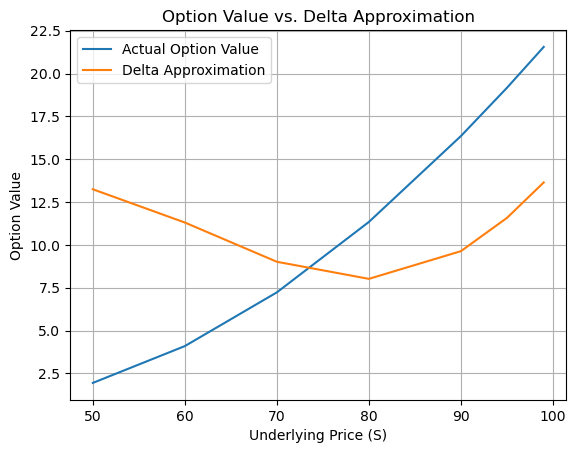

In [55]:
import matplotlib.pyplot as plt
import numpy as np

S_list = np.array([50, 60, 70, 80, 90, 95, 99])

actual_values = np.array([black_scholes1(s, K, r, d, sigma, T)[0] for s in S_list])

deltas = np.array([greeks.delta(flag,s,K,T,r-d,sigma) for s in S_list])

approximate_values = call_p + deltas*(S_list-K)

plt.plot(S_list, actual_values, label="Actual Option Value")
plt.plot(S_list, approximate_values, label="Delta Approximation")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Option Value")
plt.title("Option Value vs. Delta Approximation")
plt.legend()
plt.grid(True)
plt.show()